In [1]:
# GHOST - Euler Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh2D
from Discretization import SpatialDiscretization
from Solver import Solver

# discretization degree
p = 2

# geometry mapping degree (isoparametric)
p_geo = p

# read in mesh in GMSH format
mesh = Mesh2D("test", "../mesh/square_mesh_L10_x_11y_11.msh")

filename= "p" + str(p) + "c0t1"

# set up periodic boundary conditions
left = np.array([1.0,0.0,0.0]) 
right = np.array([1.0,0.0,10.0])
bottom = np.array([0.0,1.0,0.0])
top = np.array([0.0,1.0,10.0])
mesh.add_bc_on_hyperplanes([left,right,bottom,top],[1,2,3,4])
mesh.make_periodic((1,2),[1]) # left-right periodic (bcs parallel to axis 1)
mesh.make_periodic((3,4),[0]) # top-bottom periodic (axis 0)

#curvilinear transformation used in Del Rey Fernandez et al. (2017)
mesh.map_mesh(f_map=Mesh2D.grid_transformation(warp_factor=0.2, L=10.0), p_geo=p_geo)

# volume and facet quadrature degrees
tau = 2*p
mu = 2*p+1

# solver parameters
params_strong = {"project_title": filename + "_strong",
         "problem": "compressible_euler",
         "specific_heat_ratio": 1.4,
         "numerical_flux": "roe",
         "initial_condition": "isentropic_vortex",
         "initial_vortex_centre": np.array([5.0,5.0]),
         "background_temperature": 1.0,
         "background_velocity": np.array([1.0,1.0]),
         "integration_type": "quadrature",
         "solution_degree": p,
         "volume_quadrature_degree": tau,
         "facet_quadrature_degree": mu,
         "solution_representation": "modal",
         "form": "strong",
         "time_integrator": "rk44",
         "final_time": 10.0,
         "time_step_scale": 0.005}

strong = Solver(params_strong,mesh)

params_weak = params_strong.copy()
params_weak["project_title"] = filename + "_weak"
params_weak["form"] = "weak"
weak = Solver(params,mesh)

In [2]:
strong.run(write_interval=0.01)
strong.post_process(error_quadrature_degree=4*p)

dt =  0.0005
writing every  20  time steps, total  20000
writing time step  20 : t =  0.010000000000000005
writing time step  40 : t =  0.020000000000000014
writing time step  60 : t =  0.030000000000000023
writing time step  80 : t =  0.04000000000000003
writing time step  100 : t =  0.05000000000000004
writing time step  120 : t =  0.060000000000000046
writing time step  140 : t =  0.07000000000000005
writing time step  160 : t =  0.08000000000000006
writing time step  180 : t =  0.09000000000000007
writing time step  200 : t =  0.10000000000000007
writing time step  220 : t =  0.11000000000000008
writing time step  240 : t =  0.12000000000000009
writing time step  260 : t =  0.1300000000000001
writing time step  280 : t =  0.1400000000000001
writing time step  300 : t =  0.1500000000000001
writing time step  320 : t =  0.16000000000000011
writing time step  340 : t =  0.17000000000000012
writing time step  360 : t =  0.18000000000000013
writing time step  380 : t =  0.19000000000000

writing time step  3300 : t =  1.6499999999998738
writing time step  3320 : t =  1.6599999999998727
writing time step  3340 : t =  1.6699999999998716
writing time step  3360 : t =  1.6799999999998705
writing time step  3380 : t =  1.6899999999998694
writing time step  3400 : t =  1.6999999999998683
writing time step  3420 : t =  1.7099999999998672
writing time step  3440 : t =  1.719999999999866
writing time step  3460 : t =  1.729999999999865
writing time step  3480 : t =  1.7399999999998639
writing time step  3500 : t =  1.7499999999998628
writing time step  3520 : t =  1.7599999999998617
writing time step  3540 : t =  1.7699999999998606
writing time step  3560 : t =  1.7799999999998595
writing time step  3580 : t =  1.7899999999998584
writing time step  3600 : t =  1.7999999999998573
writing time step  3620 : t =  1.8099999999998562
writing time step  3640 : t =  1.819999999999855
writing time step  3660 : t =  1.829999999999854
writing time step  3680 : t =  1.8399999999998529
writ

writing time step  6620 : t =  3.3100000000002727
writing time step  6640 : t =  3.320000000000276
writing time step  6660 : t =  3.3300000000002794
writing time step  6680 : t =  3.3400000000002827
writing time step  6700 : t =  3.350000000000286
writing time step  6720 : t =  3.3600000000002894
writing time step  6740 : t =  3.3700000000002928
writing time step  6760 : t =  3.380000000000296
writing time step  6780 : t =  3.3900000000002994
writing time step  6800 : t =  3.400000000000303
writing time step  6820 : t =  3.410000000000306
writing time step  6840 : t =  3.4200000000003095
writing time step  6860 : t =  3.430000000000313
writing time step  6880 : t =  3.440000000000316
writing time step  6900 : t =  3.4500000000003195
writing time step  6920 : t =  3.460000000000323
writing time step  6940 : t =  3.470000000000326
writing time step  6960 : t =  3.4800000000003295
writing time step  6980 : t =  3.490000000000333
writing time step  7000 : t =  3.500000000000336
writing tim

writing time step  9960 : t =  4.97999999999996
writing time step  9980 : t =  4.989999999999954
writing time step  10000 : t =  4.9999999999999485
writing time step  10020 : t =  5.009999999999943
writing time step  10040 : t =  5.019999999999937
writing time step  10060 : t =  5.029999999999932
writing time step  10080 : t =  5.039999999999926
writing time step  10100 : t =  5.049999999999921
writing time step  10120 : t =  5.059999999999915
writing time step  10140 : t =  5.06999999999991
writing time step  10160 : t =  5.079999999999904
writing time step  10180 : t =  5.089999999999899
writing time step  10200 : t =  5.099999999999893
writing time step  10220 : t =  5.1099999999998875
writing time step  10240 : t =  5.119999999999882
writing time step  10260 : t =  5.129999999999876
writing time step  10280 : t =  5.139999999999871
writing time step  10300 : t =  5.149999999999865
writing time step  10320 : t =  5.15999999999986
writing time step  10340 : t =  5.169999999999854
wri

writing time step  13240 : t =  6.619999999999051
writing time step  13260 : t =  6.629999999999045
writing time step  13280 : t =  6.63999999999904
writing time step  13300 : t =  6.649999999999034
writing time step  13320 : t =  6.6599999999990285
writing time step  13340 : t =  6.669999999999023
writing time step  13360 : t =  6.679999999999017
writing time step  13380 : t =  6.689999999999012
writing time step  13400 : t =  6.699999999999006
writing time step  13420 : t =  6.709999999999001
writing time step  13440 : t =  6.719999999998995
writing time step  13460 : t =  6.72999999999899
writing time step  13480 : t =  6.739999999998984
writing time step  13500 : t =  6.749999999998979
writing time step  13520 : t =  6.759999999998973
writing time step  13540 : t =  6.7699999999989675
writing time step  13560 : t =  6.779999999998962
writing time step  13580 : t =  6.789999999998956
writing time step  13600 : t =  6.799999999998951
writing time step  13620 : t =  6.809999999998945


writing time step  16520 : t =  8.259999999998604
writing time step  16540 : t =  8.269999999998616
writing time step  16560 : t =  8.279999999998628
writing time step  16580 : t =  8.28999999999864
writing time step  16600 : t =  8.299999999998652
writing time step  16620 : t =  8.309999999998665
writing time step  16640 : t =  8.319999999998677
writing time step  16660 : t =  8.32999999999869
writing time step  16680 : t =  8.339999999998701
writing time step  16700 : t =  8.349999999998714
writing time step  16720 : t =  8.359999999998726
writing time step  16740 : t =  8.369999999998738
writing time step  16760 : t =  8.37999999999875
writing time step  16780 : t =  8.389999999998762
writing time step  16800 : t =  8.399999999998775
writing time step  16820 : t =  8.409999999998787
writing time step  16840 : t =  8.419999999998799
writing time step  16860 : t =  8.429999999998811
writing time step  16880 : t =  8.439999999998824
writing time step  16900 : t =  8.449999999998836
wri

writing time step  19820 : t =  9.91000000000062
writing time step  19840 : t =  9.920000000000632
writing time step  19860 : t =  9.930000000000645
writing time step  19880 : t =  9.940000000000657
writing time step  19900 : t =  9.950000000000669
writing time step  19920 : t =  9.960000000000681
writing time step  19940 : t =  9.970000000000693
writing time step  19960 : t =  9.980000000000706
writing time step  19980 : t =  9.990000000000718
writing time step  20000 : t =  10.00000000000073


In [6]:
weak.run(write_interval=0.01)
weak.post_process(error_quadrature_degree=4*p)

dt =  0.0005
writing every  20  time steps, total  20000
writing time step  20 : t =  0.010000000000000005
writing time step  40 : t =  0.020000000000000014
writing time step  60 : t =  0.030000000000000023
writing time step  80 : t =  0.04000000000000003
writing time step  100 : t =  0.05000000000000004
writing time step  120 : t =  0.060000000000000046
writing time step  140 : t =  0.07000000000000005
writing time step  160 : t =  0.08000000000000006
writing time step  180 : t =  0.09000000000000007
writing time step  200 : t =  0.10000000000000007
writing time step  220 : t =  0.11000000000000008
writing time step  240 : t =  0.12000000000000009
writing time step  260 : t =  0.1300000000000001
writing time step  280 : t =  0.1400000000000001
writing time step  300 : t =  0.1500000000000001
writing time step  320 : t =  0.16000000000000011
writing time step  340 : t =  0.17000000000000012
writing time step  360 : t =  0.18000000000000013
writing time step  380 : t =  0.19000000000000

writing time step  3300 : t =  1.6499999999998738
writing time step  3320 : t =  1.6599999999998727
writing time step  3340 : t =  1.6699999999998716
writing time step  3360 : t =  1.6799999999998705
writing time step  3380 : t =  1.6899999999998694
writing time step  3400 : t =  1.6999999999998683
writing time step  3420 : t =  1.7099999999998672
writing time step  3440 : t =  1.719999999999866
writing time step  3460 : t =  1.729999999999865
writing time step  3480 : t =  1.7399999999998639
writing time step  3500 : t =  1.7499999999998628
writing time step  3520 : t =  1.7599999999998617
writing time step  3540 : t =  1.7699999999998606
writing time step  3560 : t =  1.7799999999998595
writing time step  3580 : t =  1.7899999999998584
writing time step  3600 : t =  1.7999999999998573
writing time step  3620 : t =  1.8099999999998562
writing time step  3640 : t =  1.819999999999855
writing time step  3660 : t =  1.829999999999854
writing time step  3680 : t =  1.8399999999998529
writ

writing time step  6620 : t =  3.3100000000002727
writing time step  6640 : t =  3.320000000000276
writing time step  6660 : t =  3.3300000000002794
writing time step  6680 : t =  3.3400000000002827
writing time step  6700 : t =  3.350000000000286
writing time step  6720 : t =  3.3600000000002894
writing time step  6740 : t =  3.3700000000002928
writing time step  6760 : t =  3.380000000000296
writing time step  6780 : t =  3.3900000000002994
writing time step  6800 : t =  3.400000000000303
writing time step  6820 : t =  3.410000000000306
writing time step  6840 : t =  3.4200000000003095
writing time step  6860 : t =  3.430000000000313
writing time step  6880 : t =  3.440000000000316
writing time step  6900 : t =  3.4500000000003195
writing time step  6920 : t =  3.460000000000323
writing time step  6940 : t =  3.470000000000326
writing time step  6960 : t =  3.4800000000003295
writing time step  6980 : t =  3.490000000000333
writing time step  7000 : t =  3.500000000000336
writing tim

writing time step  9960 : t =  4.97999999999996
writing time step  9980 : t =  4.989999999999954
writing time step  10000 : t =  4.9999999999999485
writing time step  10020 : t =  5.009999999999943
writing time step  10040 : t =  5.019999999999937
writing time step  10060 : t =  5.029999999999932
writing time step  10080 : t =  5.039999999999926
writing time step  10100 : t =  5.049999999999921
writing time step  10120 : t =  5.059999999999915
writing time step  10140 : t =  5.06999999999991
writing time step  10160 : t =  5.079999999999904
writing time step  10180 : t =  5.089999999999899
writing time step  10200 : t =  5.099999999999893
writing time step  10220 : t =  5.1099999999998875
writing time step  10240 : t =  5.119999999999882
writing time step  10260 : t =  5.129999999999876
writing time step  10280 : t =  5.139999999999871
writing time step  10300 : t =  5.149999999999865
writing time step  10320 : t =  5.15999999999986
writing time step  10340 : t =  5.169999999999854
wri

writing time step  13240 : t =  6.619999999999051
writing time step  13260 : t =  6.629999999999045
writing time step  13280 : t =  6.63999999999904
writing time step  13300 : t =  6.649999999999034
writing time step  13320 : t =  6.6599999999990285
writing time step  13340 : t =  6.669999999999023
writing time step  13360 : t =  6.679999999999017
writing time step  13380 : t =  6.689999999999012
writing time step  13400 : t =  6.699999999999006
writing time step  13420 : t =  6.709999999999001
writing time step  13440 : t =  6.719999999998995
writing time step  13460 : t =  6.72999999999899
writing time step  13480 : t =  6.739999999998984
writing time step  13500 : t =  6.749999999998979
writing time step  13520 : t =  6.759999999998973
writing time step  13540 : t =  6.7699999999989675
writing time step  13560 : t =  6.779999999998962
writing time step  13580 : t =  6.789999999998956
writing time step  13600 : t =  6.799999999998951
writing time step  13620 : t =  6.809999999998945


writing time step  16520 : t =  8.259999999998604
writing time step  16540 : t =  8.269999999998616
writing time step  16560 : t =  8.279999999998628
writing time step  16580 : t =  8.28999999999864
writing time step  16600 : t =  8.299999999998652
writing time step  16620 : t =  8.309999999998665
writing time step  16640 : t =  8.319999999998677
writing time step  16660 : t =  8.32999999999869
writing time step  16680 : t =  8.339999999998701
writing time step  16700 : t =  8.349999999998714
writing time step  16720 : t =  8.359999999998726
writing time step  16740 : t =  8.369999999998738
writing time step  16760 : t =  8.37999999999875
writing time step  16780 : t =  8.389999999998762
writing time step  16800 : t =  8.399999999998775
writing time step  16820 : t =  8.409999999998787
writing time step  16840 : t =  8.419999999998799
writing time step  16860 : t =  8.429999999998811
writing time step  16880 : t =  8.439999999998824
writing time step  16900 : t =  8.449999999998836
wri

writing time step  19820 : t =  9.91000000000062
writing time step  19840 : t =  9.920000000000632
writing time step  19860 : t =  9.930000000000645
writing time step  19880 : t =  9.940000000000657
writing time step  19900 : t =  9.950000000000669
writing time step  19920 : t =  9.960000000000681
writing time step  19940 : t =  9.970000000000693
writing time step  19960 : t =  9.980000000000706
writing time step  19980 : t =  9.990000000000718
writing time step  20000 : t =  10.00000000000073


In [28]:
for e in range(0,4):
    print("{:.3e}".format(strong.calculate_difference(weak)[e]), "& ", 
          "{:.3e}".format((strong.I_f - strong.I_0)[e]), "& ", 
          "{:.3e}".format((weak.I_f - weak.I_0)[e]), "& ", 
    "{:.3e}".format(strong.calculate_error()[e]), "& ",
    "{:.3e}".format(weak.calculate_error()[e]), " \\\\")
    

3.299e-14 &  2.842e-13 &  4.263e-14 &  1.126e-01 &  1.126e-01  \\
4.482e-14 &  2.558e-13 &  -1.421e-14 &  2.568e-01 &  2.568e-01  \\
4.120e-14 &  7.390e-13 &  4.832e-13 &  2.199e-01 &  2.199e-01  \\
1.255e-13 &  1.137e-12 &  2.274e-13 &  5.901e-01 &  5.901e-01  \\


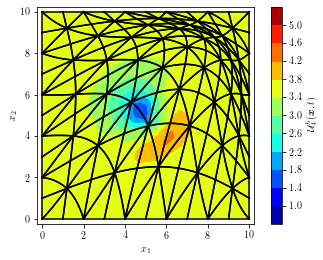

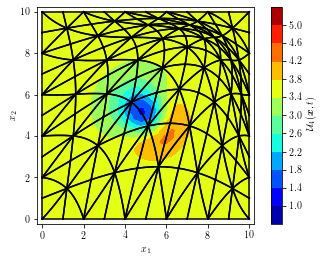

In [36]:
strong.plot(u_range=(1.0,5.0),equation_index=3)

In [30]:
strong.u_0(np.array([5.0,5.0]))

array([0.49380732, 0.49380732, 0.49380732, 1.42474487])

In [31]:
strong.u_0(np.array([4.0,5.0]))

array([0.78894755, 0.78894755, 0.16112304, 2.20486432])

In [32]:
strong.u_0(np.array([6.0,5.0]))

array([0.78894755, 0.78894755, 1.41677206, 3.46051334])

In [35]:
strong.u_hvmin, strong.u_hvmax

([0.47457073883543865,
  0.21464628908362413,
  0.15242784623599248,
  1.3468444124843852],
 [1.0457459888512448,
  1.4671379948918837,
  1.4559119370424705,
  4.2730224387865805])